In [1]:
import pandas as pd
import numpy as np
import time 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # to slace the dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # to cross validate accuracy
from ucimlrepo import fetch_ucirepo, list_available_datasets
# check which datasets can be imported
#list_available_datasets()
from sklearn.impute import SimpleImputer # to imput missing value
from TSVM_class import TSVM    # algorithm Twin Support Vector Machine (TSVM)
from S_TSVM_class import S_TSVM #algorithm Structural Twin Support Vector Machine (S_TSVM)
from TSVM_MCD_class import TSVM_MCD

In [7]:
### Linear Kernel 
### liver_disorders    (345, 5) 16 classes
print('liver_disorders with Linear Kernel')
# fetch liver_disorders dataset
liver_disorders = fetch_ucirepo(id=60)
# data (as pandas dataframes)
X1 = liver_disorders.data.features
y1 = liver_disorders.data.targets
X = X1.values
y = y1.values.ravel()
#print(type(X), type(y), X.shape, y.shape)
#print('class labels', np.unique(y))
B = X[np.where(y <= 5)]
A = X[np.where(y > 5)]
y_A = np.ones(len(A))
y_B = -np.ones(len(B))
AB = np.vstack((A,B))
y_AB = np.hstack((y_A, y_B))
AB_train, AB_test, y_train, y_test = train_test_split(AB, y_AB, test_size = 0.3, random_state = 1000)
#scale the dataset
mms = MinMaxScaler()
AB_train_mms = mms.fit_transform(AB_train)
AB_test_mms = mms.transform(AB_test)


liver_disorders with Linear Kernel


In [3]:
print("Hepatitis with Linear Kernel")
# fetch hepatitis dataset
hepatitis = fetch_ucirepo(id=46)
# data (as pandas dataframes)
X1 = hepatitis.data.features
y1 = hepatitis.data.targets
imr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imr1 = imr.fit(X1)
X = imr1.transform(X1)
y = y1.values.ravel()
#print("class labels", np.unique(y))
A = X[np.where(y == 1)]
B = X[np.where(y == 2)]
y_A = np.ones(len(A))
y_B = -np.ones(len(B))
AB = np.vstack((A,B))
y_AB = np.hstack((y_A, y_B))
AB_train, AB_test, y_train, y_test = train_test_split(AB, y_AB, test_size = 0.3, random_state = 1000) 
#scale the dataset
stdsc = StandardScaler()
AB_train_std = stdsc.fit_transform(AB_train)
AB_test_std = stdsc.transform(AB_test)
AB_std = stdsc.fit_transform(AB)
mms = MinMaxScaler()
AB_train_mms = mms.fit_transform(AB_train)
AB_test_mms = mms.transform(AB_test)
AB_mms = mms.transform(AB)

Hepatitis with Linear Kernel


In [8]:
### TSVM:
start_time = time.time()
clf_tsvm = TSVM( c = 1, c_ = 1)
# clf_tsvm.fit(AB_train_mms, y_train)
# print('Test accuracy of TSVM: %.1f' % clf_tsvm.score(AB_test_mms, y_test))
# ###Cross validation score of TSVM
# scores = cross_val_score(estimator = clf_tsvm, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
# #print('CV accuracy scores of TSVM: %s' %scores)
# print('CV accuracy of TSVM: %.1f +/- %.1f' % (np.mean(scores), np.std(scores)))
### Tuning hyperparameters via grid search (TSVM)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid_tsvm = [{'c': param_range, 'c_': param_range}]
gs_tsvm = GridSearchCV(estimator = clf_tsvm, param_grid = param_grid_tsvm, scoring = 'accuracy', cv = 10, n_jobs = -1)
gs_tsvm = gs_tsvm.fit(AB_train_mms, y_train)
print('best score of TSVM: ', gs_tsvm.best_score_)
print('best params of TSVM', gs_tsvm.best_params_)
clf_tsvm = gs_tsvm.best_estimator_
clf_tsvm.fit(AB_train_mms, y_train)
print('Test accuracy of TSVM: %.1f' % clf_tsvm.score(AB_test_mms, y_test))
scores = cross_val_score(estimator = clf_tsvm, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
print('CV accuracy of TSVM: %.1f +/- %.1f' %(np.mean(scores), np.std(scores)))
end_time = time.time()
print('total run time of TSVM: %.2f ' %((end_time - start_time)))

best score of TSVM:  0.7341666666666666
best params of TSVM {'c': 0.0001, 'c_': 0.0001}
Test accuracy of TSVM: 78.8
CV accuracy of TSVM: 73.4 +/- 8.2
total run time of TSVM: 8.69 


In [9]:
### S_TSVM:
start_time = time.time()
clf_stsvm = S_TSVM(c1 = 1, c2 = 1, c3 = 1, c4 = 1)
# clf_stsvm.fit(AB_train_mms, y_train)
# print('Test accuracy of S_TSVM: %.1f' % clf_stsvm.score(AB_test_mms, y_test))
# ###Cross validation score of S_TSVM
# scores = cross_val_score(estimator = clf_stsvm, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
# #print('CV accuracy scores of S_TSVM: %s' %scores)
# print('CV accuracy of S_TSVM: %.1f +/- %.1f' % (np.mean(scores), np.std(scores)))
### Tuning hyperparameters via grid search (S_TSVM)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid_stsvm = [{'c1': param_range, 'c4': param_range}]
gs_stsvm = GridSearchCV(estimator = clf_stsvm, param_grid = param_grid_stsvm, scoring = 'accuracy', cv = 10, n_jobs = -1)
gs_stsvm = gs_stsvm.fit(AB_train_mms, y_train)
print('best score of S_TSVM: ', gs_stsvm.best_score_)
print('best params of S_TSVM', gs_stsvm.best_params_)
clf_stsvm = gs_stsvm.best_estimator_
clf_stsvm.fit(AB_train_mms, y_train)
print('Test accuracy of S_TSVM: %.1f' % clf_stsvm.score(AB_test_mms, y_test))
scores = cross_val_score(estimator = clf_stsvm, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
print('CV accuracy of S_TSVM: %.1f +/- %.1f' %(np.mean(scores), np.std(scores)))
end_time = time.time()
print('total run time of S_TSVM: %.2f ' %((end_time - start_time)))

best score of S_TSVM:  0.7341666666666666
best params of S_TSVM {'c1': 0.0001, 'c4': 0.0001}
Test accuracy of S_TSVM: 78.8
CV accuracy of S_TSVM: 73.4 +/- 8.2
total run time of S_TSVM: 8.50 


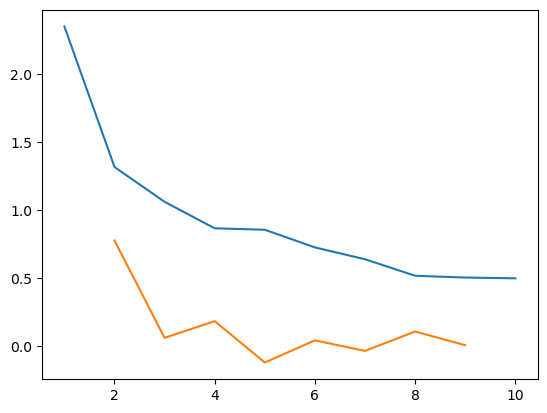

clusters_A: None
Clusters_B: None
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 2 1 1 2 1 2 1 2
 1 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 2 2 2]


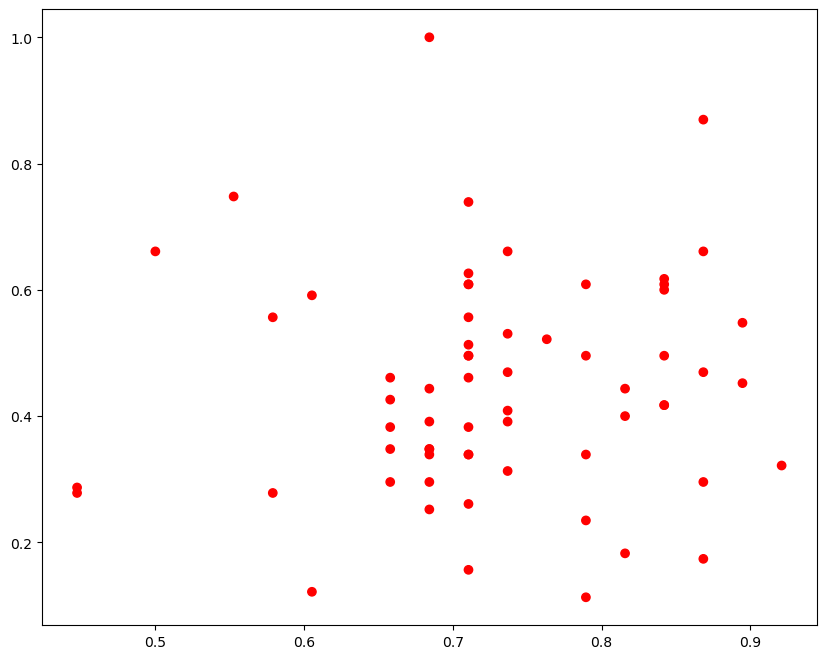

best score of TSVM_MCD:  0.7675000000000001
best params of TSVM_MCD {'c1': 0.0001, 'c3': 0.0001}


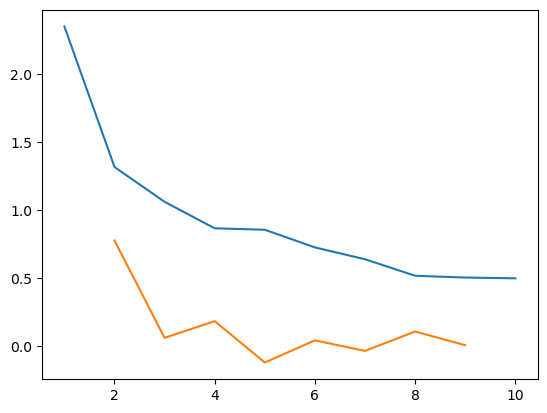

clusters_A: 1
Clusters_B: 2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 2 1 1 2 1 2 1 2
 1 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 2 2 2]


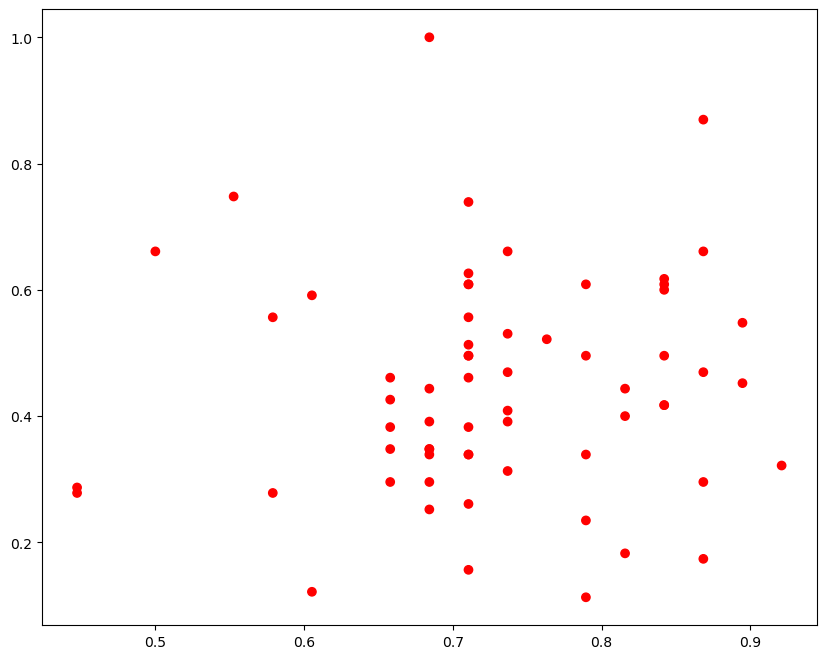

Test accuracy of TSVM_MCD: 78.8
CV accuracy of TSVM_MCD: 76.8 +/- 8.2
total run time of TSVM_MCD: 35.06 
(k, l): (1.0, 2.0)


In [10]:
### TSVM_MCD:
start_time = time.time()
clf_tsvm_mcd = TSVM_MCD(c1 = 1, c2 = 1, c3 = 1, c4 = 1)
# clf_tsvm_mcd.fit(AB_train_mms, y_train)
# print('Test accuracy of TSVM_MCD: %.1f' % clf_tsvm_mcd.score(AB_test_mms, y_test))
# ###Cross validation score of TSVM_MCD
# scores = cross_val_score(estimator = clf_tsvm_mcd, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
# #print('CV accuracy scores of TSVM_MCD: %s' %scores)
# print('CV accuracy of TSVM_MCD: %.1f +/- %.1f' % (np.mean(scores), np.std(scores)))
### Tuning hyperparameters via grid search (TSVM_MCD)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid_tsvm_mcd = [{'c1': param_range, 'c3': param_range}]
gs_tsvm_mcd = GridSearchCV(estimator = clf_tsvm_mcd, param_grid = param_grid_tsvm_mcd, scoring = 'accuracy', cv = 10, n_jobs = -1)
gs_tsvm_mcd = gs_tsvm_mcd.fit(AB_train_mms, y_train)
print('best score of TSVM_MCD: ', gs_tsvm_mcd.best_score_)
print('best params of TSVM_MCD', gs_tsvm_mcd.best_params_)
clf_tsvm_mcd = gs_tsvm_mcd.best_estimator_
clf_tsvm_mcd.fit(AB_train_mms, y_train)
print('Test accuracy of TSVM_MCD: %.1f' % clf_tsvm_mcd.score(AB_test_mms, y_test))
scores = cross_val_score(estimator = clf_tsvm_mcd, X = AB_train_mms, y = y_train, cv = 10, n_jobs = -1)
print('CV accuracy of TSVM_MCD: %.1f +/- %.1f' %(np.mean(scores), np.std(scores)))
end_time = time.time()
print('total run time of TSVM_MCD: %.2f ' %((end_time - start_time)))
print("(k, l): (%.1f, %.1f)" %((clf_tsvm_mcd.k, clf_tsvm_mcd.l)))